## Classical Mechanics - Week 4

### Last week we:
- Gained our (possibly) first experience with computational physics through Euler's Method and compared it to the analytical solution
- Analyzed the motion of an object involving linear drag
- Gained a deeper understanding of how we can use arrays in Python 
 
### This week we will:
- Practice further using arrays to store information
- Graph the motion of quadratic drag system
- Work with Euler's Method in 2D

In [1]:
# Let's import packages, as usual
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

Arrays are a valuable asset in Python. As we move forward, we will be utilizing them more for the purposes of storing information and analyzing data. Let's get some more practice with them to build familiarity with what we can do.

Below create two arrays, a and b, with three nonzero integers.

In [2]:
## Create your a and b arrays here
a = np.array([4,2,4])
b = np.array([6,2,4])

In [3]:
### now run the cell below to find their dot product
np.dot(a,b)

44

### Using np.dot() and the power function (i.e. **), find the magnitude of your vectors a and b in the cell below. 

In [4]:
mag_a = np.dot(a,a)**(1/2)
mag_b = np.dot(b,b)**(1/2)
print(mag_a)
print(mag_b)

6.0
7.483314773547883


Another way of doing this directly is to use the "numpy.linalg.norm()" function. Give that a shot if you are curious to see it work.

# Q1.) What were the vectors a and b you created, and what did you calculate for their magnitudes using Python?

&#9989; Double click this cell, erase its content, and put your answer to the above question here.

## Last week you created arrays that were containers for arrays (arrayception). Let's get a bit more practice with this concept. 

In the cell below we create $I_x$, $I_y$, and $I_z$ arrays that are 1x10 and contain random values. Write a line of code that places them inside an array called $I$ where its $x$, $y$, and $z$ components correspond with the labels 0, 1, and 2 in the randomly created array. We already provide $I_x$ for you.

In [7]:
I_x = np.random.rand(1,10)
I_y = np.random.rand(1,10)
I_z = np.random.rand(1,10)
### Place the above arrays inside one array
I = np.array([I_x,I_y,I_z])

Now, treating our $I$ array as data collected, make three plots below: 

$I[0] vs I[1]$

$I[1] vs I[2]$

$I[2] vs I[0]$

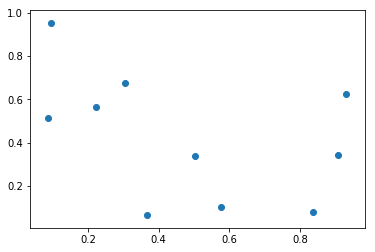

In [8]:
## I_0 vs I_1
plt.scatter(I[0],I[1])

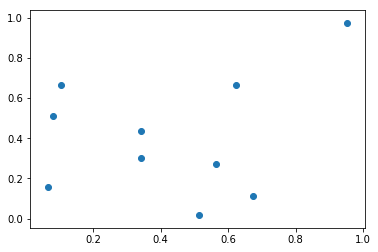

In [9]:
## I_1 vs I_2
plt.scatter(I[1],I[2])

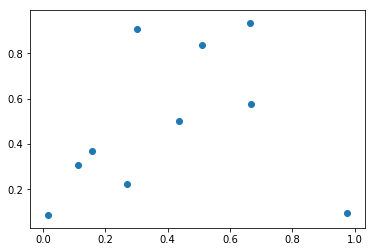

In [10]:
## I_2 vs I_0
plt.scatter(I[2],I[0])

### Using the $t$ array created below, create a new array $p$ whose $x$, $y$, and $z$ components have the following equation:

$p_x = 2t$

$p_y = 7t^2 - 1$

$p_z = (0.5)t^2 - 4t$

In [11]:
t = np.arange(0,10,0.1)

## Create your p array here
p = np.array([2*t,7*t**2-1,0.5*t**2-4*t])

Using your newly created p array, create another 3 plots as done with the I array.

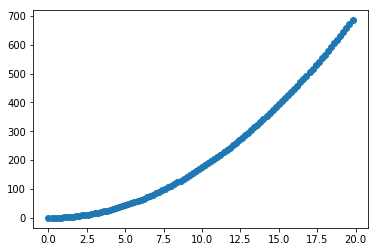

In [12]:
## p_0 vs p_1
plt.scatter(p[0],p[1])

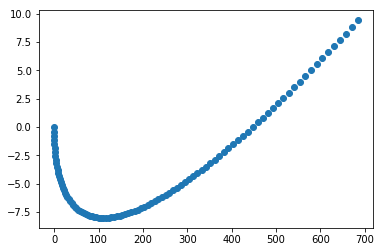

In [13]:
## p_1 vs p_2
plt.scatter(p[1],p[2])

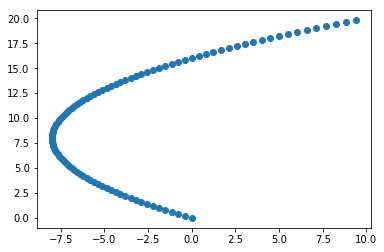

In [14]:
## p_2 vs p_0
plt.scatter(p[2],p[0])

Now that we have even more familiarity with arrays, let's use this knowledge to plot the trajectory for projectile motion in the presence of a linear drag force in 2 dimensions using Euler's method. 

## Linear Drag force in 2D:

#### With air resistance factored in, the acceleration is:
eq 1a.) $a_x = - \dfrac{v_x}{\tau}$                                                                              

eq 1b.) $a_y = - \dfrac{v_y}{\tau} - g$

#### Performing an integration, we get the velocitiy at time t with air resistance:
eq 2a.) $v_{x}(t) = v_{0x}e^{-t/\tau}$

eq 2b.) $v_{y}(t) =  -v_\mathrm{ter}+ (v_{0y} + v_\mathrm{ter})e^{- t/\tau}$,$\qquad v_\mathrm{ter}=g\tau$

-------------------------

Let's perform Euler's (Forward) Method once again to computationally determine the motion of the projectile. **A quick reminder of how to perform this for projectile motion:**

1.) Define and obtain all initial values, constants, and time to be analyzed with step sizes

2.) Calculate the velocity using $v_{i+1} = v_{i} + h*a_{i}$

3.) Calculate the position using $pos_{i+1} = pos_{i} + h*v_{i}$

4.) Calculate the new acceleration $a_{i+1}$ using eqs 1a and 1b with $v_{i+1}$. 

5.) Repeat steps 2-4 for all time steps within a loop.

**This will NOW be in 2D, so your vectors must have x and y components.** Suppose we have a canon ball fired with the initial conditions as follows:

- $v_i = 20\ m/s$ (initial speed)
- $\theta = 70^{\circ}$ (initial angle above the horizontal)
- $g = 9.8\ m/s$ 
- $\tau = 10\ s$  (time constant for linear drag)
- $t_f = 5\ s$  (total time analyzed)

Once again, we have given you an outline for setting up inital values and for defining storage for the arrays. We have already provided you the code for the r vector, in order to demonstrate how to set up the vectors in 2 dimensions.

In [15]:
# Initial values and constants

vi = 20# m/s
g = 9.8# m/s^2
tau = 10# s
theta_deg = 70# degrees
theta_rad = np.radians(theta_deg)# radians
vi_y = vi*np.sin(theta_rad)# m/s
vi_x = vi*np.cos(theta_rad)# m/s

ai_y = -g-vi_y/tau# m/s^2
ai_x = -vi_x/tau# m/s^2

tf = 5#The final time
dt = 0.1# time step size

t = np.arange(0.0,tf,dt) # Creates an evenly spaced time array going from 0 to 5, with step size 0.1

a = np.array([np.zeros(len(t)),np.zeros(len(t))])# Create an array of zeros for [ax,ay] values. Storage size is N
v = np.array([np.zeros(len(t)),np.zeros(len(t))])# Create an array of zeros for [vx,vy] values. Storage size is N
r = np.array([np.zeros(len(t)),np.zeros(len(t))])# Create an array of zeros for [x,y] values. Storage size is N

### Sets initial values in vectors
v[0,0] = vi_x# Initial x velocity should go here
v[1,0] = vi_y# Initial y velocity should go here
a[0,0] = ai_x# Initial x accleration should go here
a[1,0] = ai_y# Initial y accleration should go here

avec = np.array([0,g]) # Creates a conatant vector (independent of t) for acceleration due to gravity with x and y components


In [16]:
# Performing Euler's method in 2D here
# We have already set up the update for acceleration to show you how to work with 2D vectors to access the desired information.
for i in range(0,len(t)-1):
    v[:,i+1] = v[:,i]+dt*a[:,i] # Insert Euler's method formula for updating velocity
    r[:,i+1] = r[:,i]+dt*v[:,i]# Insert Euler's method formula for updating position
    a[:,i+1] = -v[:,i]/tau-avec# Update acceleration using eq. 1 and inserting v[i+1] for v

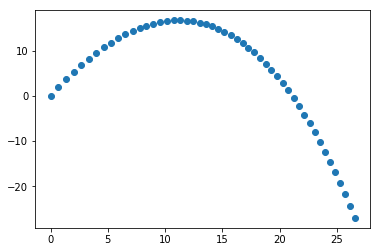

In [17]:
## Scatter plot the x and y once you have the above working.

plt.scatter(r[0],r[1])

## Now let's compare this to the analytical solution.
Integrate eq 2a and 2b to obtain the position as a function of time.  Then create a graph of the analytical solution to compare with our Euler calculation. Feel free to look at your previous notebooks to see how we did it before.

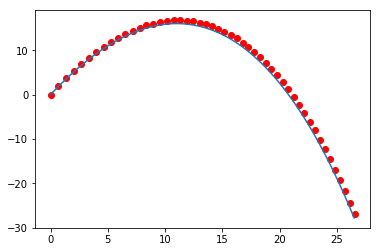

In [18]:
## Plot the analytical and numerical solutions side by side here
ta = np.arange(0.0,tf,0.1)
vter=g*tau
ra = np.array([vi_x*tau*(1-np.exp(-ta/tau)),(vi_y+vter)*tau*(1-np.exp(-ta/tau))-vter*ta])
plt.scatter(r[0],r[1],c='r')
plt.plot(ra[0],ra[1])

# Now let's utilize what we have learned in order to solve for projectile motion with a quadratic drag force.
In this case there is no analytical solution, so we must use a numerical method in order to find the trajectory.
In the cell below create a function that performs Euler's Forward Method to obtain the motion as a function of time in the presence of a quadratic drag force.

By manipulating the force equations from class, we can write the equations of motion with quadratic drag as:

eq 3a.) $a_y = -g - g\dfrac{v_y\sqrt{v_x^2+v_y^2}}{v_\mathrm{ter}^2}$

eq 3b.) $a_x = -g\dfrac{v_x\sqrt{v_x^2+v_y^2}}{v_\mathrm{ter}^2}\,,$

where we have used the relation $c/m=g/v_\mathrm{ter}^2$ in order to express everything in terms of $g$ and the terminal speed, $v_\mathrm{ter}$.

Use these equations to calculate your acceleration in your Euler method function.

In [30]:
def EulerQuad(vi, theta_deg, tf, dt, vter):

    # Set initial values and conversions here. We give you g
    g = 9.8# m/s^2
    theta_rad = np.radians(theta_deg)# radians
    vi_y = vi*np.sin(theta_rad)# m/s
    vi_x = vi*np.cos(theta_rad)# m/s

    ai_y = -g-g*vi_y*(vi_x**2+vi_y**2)**(1/2)/vter**2 # m/s^2
    ai_x = -g*vi_x*(vi_x**2+vi_y**2)**(1/2)/vter**2 # m/s^2

    # Create your arrays here
  
    t = np.arange(0.0,tf,dt) # Creates an evenly spaced time array going from 0 to 5, with step size 0.1

    a = np.array([np.zeros(len(t)),np.zeros(len(t))])# Create an array of zeros for [ax,ay] values. Storage size is N
    v = np.array([np.zeros(len(t)),np.zeros(len(t))])# Create an array of zeros for [vx,vy] values. Storage size is N
    r = np.array([np.zeros(len(t)),np.zeros(len(t))])# Create an array of zeros for [x,y] values. Storage size is N

    ### Sets initial values in vectors
    v[0,0] = vi_x# Initial x velocity should go here
    v[1,0] = vi_y# Initial y velocity should go here
    a[0,0] = ai_x# Initial x accleration should go here
    a[1,0] = ai_y# Initial y accleration should go here

    avec = np.array([0,g]) # Creates a constant vector (independent of t) for acceleration due to gravity with x and y components
        
    # Performing Euler's method
    for i in range(0,len(t)-1):
        v[:,i+1] = v[:,i]+dt*a[:,i] # Insert Euler's method formula for updating velocity
        r[:,i+1] = r[:,i]+dt*v[:,i]# Insert Euler's method formula for updating position
        a[:,i+1] = -g*v[:,i+1]*(v[0,i+1]**2+v[1,i+1]**2)**(1/2)/vter**2-avec# Update acceleration using eq. 3 and inserting v[i+1] for v      
    
    # Plot your x and y values here
    plt.scatter(r[0],r[1],s = 0.5)

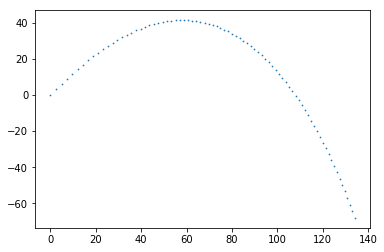

In [31]:
## Test your Euler's function here
EulerQuad(40,52,8,.1,50)

***Set the initial conditions to be:***

$v_i = 40\ m/s$

$\theta = 52^{\circ}$

$v_\mathrm{ter} = 50\ m/s$

$t_f = 8\ s$

Try different step sizes.  For large step sizes, you should see that the trajectory depends on step size.
However, if the step size is small enough, the trajectory should become independent of step size.

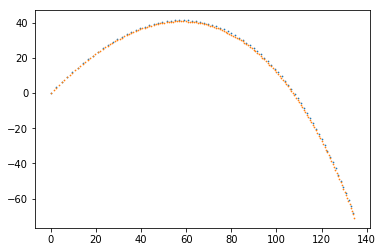

In [33]:
## Test your Euler's method function here
EulerQuad(40,52,8,.1,50)
EulerQuad(40,52,8,.05,50)

# Q2.) Around what time step size does the projectile's path stop looking different regardless of how small we have the step size?

&#9989; Double click this cell, erase its content, and put your answer to the above question here.

As a final check, note that you should be able to compare your plot of the trajectory against Figure 2.10 in Taylor if you choose the appropriate parameters.  Try that here:

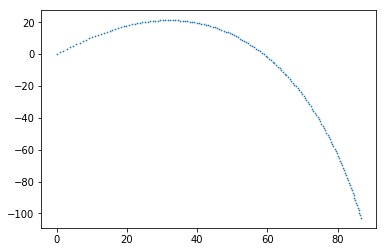

In [38]:
## Test your Euler's method function with parameters from Figure 2.10.

EulerQuad(30,50,8,.05,35)


# Notebook Wrap-up. 
Run the cell below and copy-paste your answers into their corresponding cells.

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.gle/Fqi9Y6xraQhmNq9j6" 
	width="100%" 
	height="1200px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

# Congrulations! You are done with this week's notebook!
Feel free to play around with what you have learned so far, review this notebook, or whatever. I can't really control you or what you do, the world is your oyster.